In [10]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
folder_selected = r'D:\results\Results_ANS\subjectFolderExperiment'
df_events = loading_from_listfolder(folder_selected,'df_events_bandpower1330_ICA_nozscore')
folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')
    
print('Number of subjects found: ' + str(len(df_events)))

D:\results\Results_ANS\subjectFolderExperiment\s0
D:\results\Results_ANS\subjectFolderExperiment\s01
D:\results\Results_ANS\subjectFolderExperiment\s02
D:\results\Results_ANS\subjectFolderExperiment\s03
D:\results\Results_ANS\subjectFolderExperiment\s04
D:\results\Results_ANS\subjectFolderExperiment\s05
D:\results\Results_ANS\subjectFolderExperiment\s06
D:\results\Results_ANS\subjectFolderExperiment\s07
D:\results\Results_ANS\subjectFolderExperiment\s08
D:\results\Results_ANS\subjectFolderExperiment\s09
D:\results\Results_ANS\subjectFolderExperiment\s10
D:\results\Results_ANS\subjectFolderExperiment\s11
D:\results\Results_ANS\subjectFolderExperiment\s12
D:\results\Results_ANS\subjectFolderExperiment\s13
D:\results\Results_ANS\subjectFolderExperiment\s14
D:\results\Results_ANS\subjectFolderExperiment\s15
D:\results\Results_ANS\subjectFolderExperiment\s16
D:\results\Results_ANS\subjectFolderExperiment\s17
D:\results\Results_ANS\subjectFolderExperiment\s18
D:\results\Results_ANS\subjectFo

In [61]:
# print(np.shape(df_events))
# df_events = df_events[4::]
# print(np.shape(df_events))

# Phase coupling analysis

In [12]:
nbins = 7
bins = np.linspace(-np.pi, np.pi, nbins)
bins = np.rad2deg(bins);
diff_bins = np.round(bins[1] - bins[0])
print(int(diff_bins))
print(bins)

60
[-180. -120.  -60.    0.   60.  120.  180.]


In [13]:
GA_df_events = dict()
list_subjects_events = []
nSubjects = len(df_events)
for iEvent,event_type in enumerate(df_events[0].keys()):
    print(event_type)
    list_subjects_events = []
    list_subjects_events_conca = []
    for iSubject in range(nSubjects):
        df_events[iSubject][event_type]['subjectID'] = iSubject
        df_events[iSubject][event_type]['group'] = df_events[iSubject][event_type]['group']*int(diff_bins)
        df_events[iSubject][event_type] = df_events[iSubject][event_type]
        list_subjects_events.append(df_events[iSubject][event_type])
    list_subjects_events_conca = pd.concat(list_subjects_events)
    GA_df_events.update({event_type:list_subjects_events_conca})

Mu_HOLD
Mu_MI_START
Mu_MI_STOP
Beta_HOLD
Beta_MI_START
Beta_MI_STOP


Mu_HOLD
Mu_MI_START
Beta_HOLD
Beta_MI_START


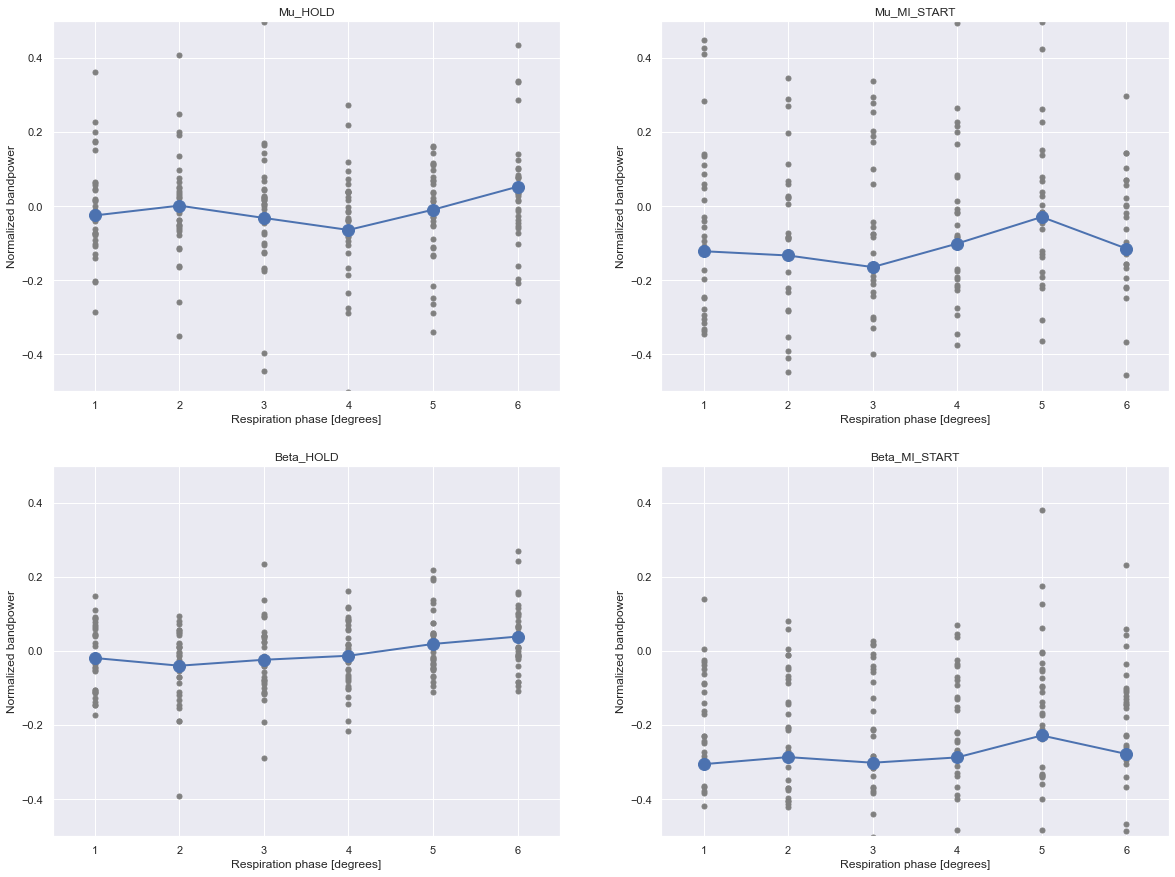

In [34]:
listInterest = ['Mu_HOLD',
'Mu_MI_START',
'Beta_HOLD',
'Beta_MI_START']


import seaborn as sns
import pandas as pd
import matplotlib.ticker as tck
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))    
df_new = pd.DataFrame()
sns.set()
for iEvent,event_type in enumerate(listInterest):
    print(event_type)
    df = GA_df_events[event_type]
    df_new = df.groupby(['group','subjectID']).mean().reset_index()
    
    mean = df_new.groupby(['group']).mean().reset_index()
    dev = df_new.groupby(['group']).sem().reset_index()
    x = mean['Power'].to_numpy()
    yerr = dev['Power'].to_numpy()

    axs=fig.add_subplot(221+iEvent)
   
    
    df2 = df_new.pivot(index='subjectID', columns='group', values='Power')
    data = df2.to_numpy()
    for iSubject in range(nSubjects):
            axs.plot(np.arange(nbins),data[iSubject,:], 'o',linewidth=0.2,color='grey', markersize=5)
    
    axs.plot(np.arange(nbins),x, '-bo',linewidth=2, markersize=12)
  
#     axs.fill_between(np.arange(nbins),x - yerr, x + yerr, color='b', alpha=0.3)
    
    axs.set_title(event_type,y=1)
    axs.set_xlabel("Respiration phase [degrees]")
    axs.set_ylabel("Normalized bandpower")
    axs.set_xlim([-125,185])
    axs.set_xlim([0.5,6.5])
    axs.set_ylim([-0.5,0.5])

path = os.path.join(folderGA,'Phase_coupling_bandpower_mean_3')
saving_figure('BandPower_values3',path,fig)

Mu_HOLD
Mu_MI_START


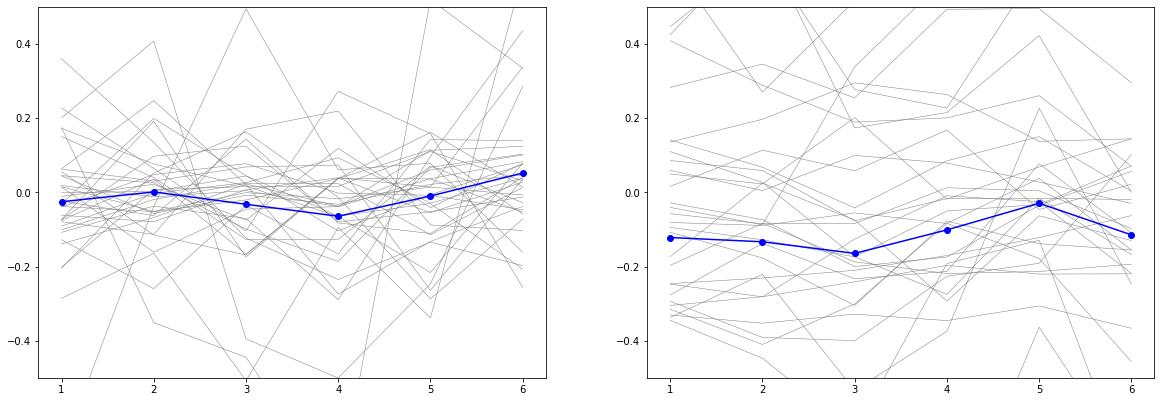

In [22]:
listInterest = ['Mu_HOLD','Mu_MI_START']


import seaborn as sns
import pandas as pd
import matplotlib.ticker as tck
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))    
df_new = pd.DataFrame()

for iEvent,event_type in enumerate(listInterest):
    print(event_type)
    df = GA_df_events[event_type]
    df_new = df.groupby(['group','subjectID']).mean().reset_index()
    axs=fig.add_subplot(221+iEvent)
    df2 = df_new.pivot(index='subjectID', columns='group', values='Power')
    data = df2.to_numpy()
    for iSubject in range(nSubjects):
            axs.plot(np.arange(nbins),data[iSubject,:], '-',linewidth=0.5,color='grey')
    x = np.nanmean(data,axis=0)
    yerr = np.nanstd(data,axis=0)/math.sqrt(34)
    axs.plot(np.arange(nbins),x, '-bo')
    axs.set_ylim([-0.5,0.5])
#     axs.fill_between(np.arange(nbins),x - yerr, x + yerr, color='b', alpha=0.3)
fig.show()

In [6]:
from scipy.optimize import curve_fit

def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

In [7]:
xdata = bins[1:]
ydata = data[:,1:]
parameters, cov = curve_fit(my_sin, xdata, ydata)

plt.plot(xdata, ydata, 'b.', label='data')
plt.plot(xdata, my_sin(xdata, *parameters), 'g--',
         label='fit: freq=%5.3f amplitude=%5.3f, phase=%5.3f, offset=%5.3f' % tuple(parameters))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [8]:
import scipy.odr
import scipy.stats

def f_wrapper_for_odr(beta, x): # parameter order for odr
    return my_sin(x, *beta)

model = scipy.odr.odrpack.Model(f_wrapper_for_odr)
data = scipy.odr.odrpack.Data(xdata,ydata)



print(parameters)
myodr = scipy.odr.odrpack.ODR(data, model, beta0=parameters,  maxit=0)


parameterStatistics = myodr.run()

df_e = len(x) - len(parameters) # degrees of freedom, error

cov_beta = parameterStatistics.cov_beta # parameter covariance matrix from ODR
sd_beta = parameterStatistics.sd_beta * parameterStatistics.sd_beta

ci = []
t_df = scipy.stats.t.ppf(0.975, df_e)
ci = []

for i in range(len(parameters)):
    ci.append([parameters[i] - t_df * parameterStatistics.sd_beta[i], parameters[i] + t_df * parameterStatistics.sd_beta[i]])

tstat_beta = parameters / parameterStatistics.sd_beta # coeff t-statistics
pstat_beta = (1.0 - scipy.stats.t.cdf(np.abs(tstat_beta), df_e)) * 2.0    # coef. p-values

for i in range(len(parameters)):
    print('parameter:', parameters[i])
    print('   conf interval:', ci[i][0], ci[i][1])
    print('   tstat:', tstat_beta[i])
    print('   pstat:', pstat_beta[i])
    print()

NameError: name 'parameters' is not defined

In [9]:
# Fit the first set

Tx = bins
tX = np.mean(data,axis=0)
print(np.shape(Tx),np.shape(tX))

fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters

p1, success = optimize.leastsq(errfunc, p0[:], args=(Tx, tX))

time = np.linspace(Tx.min(), Tx.max(), 100)
plt.plot(Tx, tX, "r.", time, fitfunc(p1, time), "b") # Plot of the data and the fit

# Legend the plot
plt.title("Phase Coupling Analysis")
plt.xlabel("Phase [degrees]")
plt.ylabel("Power [dB]")
plt.legend(('x position', 'x fit'))

ax = plt.axes()

plt.text(0.8, 0.07,
         'x freq :  %.3f kHz \n' % (1/p1[1]),
         fontsize=16,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes)

plt.show()

IndexError: tuple index out of range

Mu_MI_START


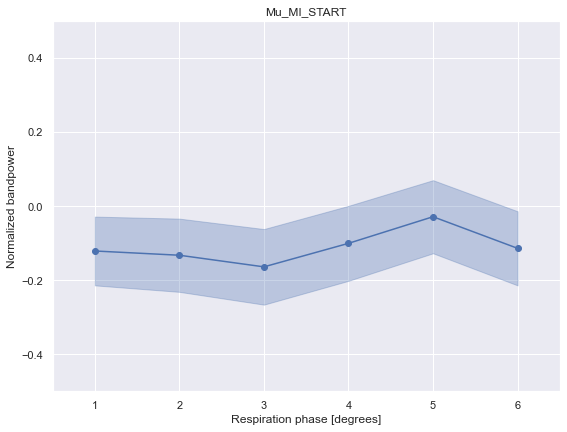

In [8]:
listInterest = ['Mu_MI_START']


import seaborn as sns
import pandas as pd
import matplotlib.ticker as tck
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))    
df_new = pd.DataFrame()

for iEvent,event_type in enumerate(listInterest):
    print(event_type)
    df = GA_df_events[event_type]
    df_new = df.groupby(['group','subjectID']).mean().reset_index()
    
    mean = df_new.groupby(['group']).mean().reset_index()
    dev = df_new.groupby(['group']).sem().reset_index()
    x = mean['Power'].to_numpy()
    yerr = dev['Power'].to_numpy()
    
    axs.plot(np.arange(nbins),x, '-bo')
    axs.fill_between(np.arange(nbins),x - yerr, x + yerr, color='b', alpha=0.3)

    axs.set_title(event_type,y=1)
    axs.set_xlabel("Respiration phase [degrees]")
    axs.set_ylabel("Normalized bandpower")
    axs.set_xlim([-125,185])
    axs.set_xlim([0.5,6.5])
    axs.set_ylim([-0.5,0.5])


In [66]:
def transform_dataframe_2d(thisData):
    #data_original = data_original[10:,:]
    group_list = np.unique(thisData[:,0])
    subject_list = np.unique(thisData[:,1])
    nGroup,nSubject = len(group_list),len(subject_list) 
    data_2d = np.zeros((nSubject,nGroup))
    for i,group in enumerate(group_list):
        index = np.where(thisData[:,0] == group)
        data_2d[:,i] = thisData[index,2]
    return data_2d

def compute_modulation_index(thisDataSubject):
    K = np.log(nbins)
    thisDataSubject = min_max_normalization(thisDataSubject)
    ratio = thisDataSubject / np.sum(thisDataSubject)
    MI=(K-(-np.nansum(ratio*np.log(ratio))))/K
    return MI

def min_max_normalization(data):
    mini,maxi = np.min(data),np.max(data)
    data = (data - np.min(data))/(np.max(data)-np.min(data))
    return data

In [67]:
GA_MI = dict()
data_original = []
for iEvent,event_type in enumerate(listInterest):
    print(event_type)
    df = GA_df_events[event_type]
    df_new = df.copy().dropna()
    df2 = df_new.groupby(['group','subjectID']).mean().reset_index()
    data_av = df2.to_numpy() 
    data_2d = transform_dataframe_2d(data_av)
    MI_real = np.zeros((nSubjects))
    for iSubject in range(nSubjects):
        thisDataSubject = data_2d[iSubject,:]
        MI_real[iSubject] = compute_modulation_index(thisDataSubject)
    GA_MI.update({event_type:np.mean(MI_real)})
    print('GA_MI =' + str(GA_MI[event_type]))
    del df_new, df

Mu_HOLD
GA_MI =0.25244872729611156
Mu_MI_START
GA_MI =0.27029218154368984
Beta_HOLD
GA_MI =0.25513067835915
Beta_MI_START
GA_MI =0.2567943055453697


In [68]:
GA_MI_surrogate_event = dict()
nPermutation = 1000
df_new = []

for iEvent,event_type in enumerate(listInterest):
    print(event_type)
    df = GA_df_events[event_type]
    df_new = df.copy().dropna()
    GA_MI_surrogate = np.zeros(nPermutation)
    for iPermutation in range(nPermutation):
        MI_surrogate = np.zeros((nSubjects))
        for iSubject in range(nSubjects):
            df_subject = df_new.copy()
            df_subject = df_subject[(df_subject["subjectID"] == iSubject)]  
            data_original = df_new.to_numpy()[:,0:2]
            nsamples = np.shape(data_original)[0]
            perm = np.random.permutation(nsamples)
            data_surrogate = data_original
            data_surrogate[:,1] = data_original[perm,1]  
            perm_data = pd.DataFrame(data_surrogate,columns=['group','Power'])
            data_surrogate = perm_data.groupby(['group']).mean().reset_index().to_numpy()[:,1]
            MI_surrogate[iSubject] = compute_modulation_index(data_surrogate)
            del df_subject
        GA_MI_surrogate[iPermutation] = np.mean(MI_surrogate)
    GA_MI_surrogate_event.update({event_type:GA_MI_surrogate})
    index = GA_MI_surrogate_event[event_type] > GA_MI[event_type]
    pval = np.sum(index)/float(nPermutation)
    print(pval)
    axs.set_title(event_type + " " + "pval = " + str(pval))
print('Finished')

Mu_HOLD
0.476
Mu_MI_START
0.041
Beta_HOLD
0.409
Beta_MI_START
0.267
Finished


Mu_HOLD
0.544
Mu_MI_START
0.371
Beta_HOLD
0.5900000000000001
Beta_MI_START
0.473


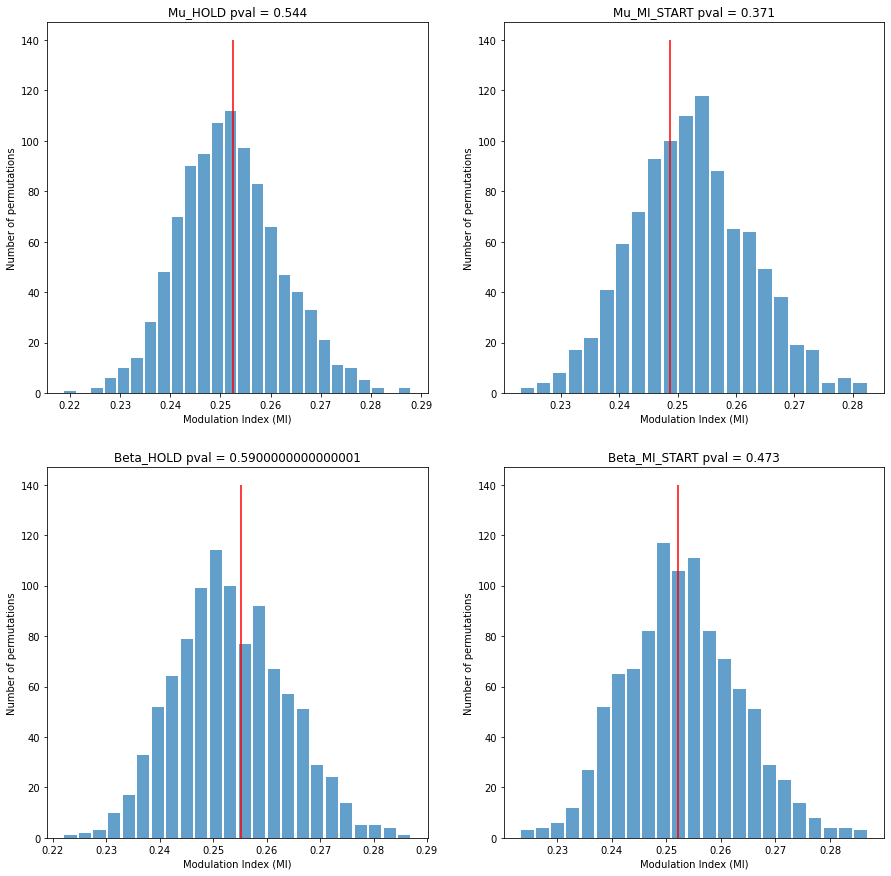

In [20]:
listInterest
fig = plt.figure(figsize=(15,15))   
for iEvent,event_type in enumerate(listInterest):
    print(event_type)
    axs=fig.add_subplot(221+iEvent)
    axs.hist(x=GA_MI_surrogate_event[event_type], bins='auto',alpha=0.7, rwidth=0.85)
    axs.set_xlabel('Modulation Index (MI)')
    axs.set_ylabel('Number of permutations') 
    axs.set_title('Histogram')
    axs.vlines(GA_MI[event_type],0, 140, colors='r')
    #axs.set_xlim([-1,3]) 
    index = GA_MI_surrogate_event[event_type] > GA_MI[event_type]
    pval = np.sum(index)/float(nPermutation)
    print(pval)
    axs.set_title(event_type + " " + "pval = " + str(pval))
plt.show()


path = os.path.join(folderGA,'Phase_coupling_bandpower_last_last1330')
# saving_figure('BandPower_Permutation',path,fig)
